# Exploratory Data Analysis of Wearable Stress Dataset

This notebook explores wearable physiological data collected during stress experiments using the Empatica E4 device. The EDA signal is loaded, timestamps are aligned, and event tags are visualized to understand stress and rest phases.

In [1]:
# Used to work with folders and paths
import os

# Used to read csv files
import pandas as pd

# Used for numbers and arrays
import numpy as np

# Used for plotting graphs
import matplotlib.pyplot as plt


In [2]:
# My dataset location (Windows)
BASE_PATH = r"C:\Users\KARAN\Downloads\Internship Project\Wearable_Dataset\Wearable_Dataset"

# STRESS folder inside dataset
STRESS_PATH = os.path.join(BASE_PATH, "STRESS")

print("STRESS PATH:", STRESS_PATH)
print("Some folders inside STRESS:", os.listdir(STRESS_PATH)[:10])


STRESS PATH: C:\Users\KARAN\Downloads\Internship Project\Wearable_Dataset\Wearable_Dataset\STRESS
Some folders inside STRESS: ['f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08', 'f09', 'f10']


In [3]:
# Get only subject folders
subjects = sorted([s for s in os.listdir(STRESS_PATH) if os.path.isdir(os.path.join(STRESS_PATH, s))])

# Find first subject that contains EDA.csv
subject = None
for s in subjects:
    files = os.listdir(os.path.join(STRESS_PATH, s))
    if "EDA.csv" in files:   # exact name check
        subject = s
        break

# If subject not found, stop with clear message
if subject is None:
    raise Exception("No subject found with EDA.csv (exact file name).")

SUBJECT_PATH = os.path.join(STRESS_PATH, subject)

print("Selected subject:", subject)
print("Files in subject folder:", os.listdir(SUBJECT_PATH))


Selected subject: S01
Files in subject folder: ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'IBI.csv', 'tags.csv', 'TEMP.csv']


In [4]:
# Load EDA.csv

eda_path = os.path.join(SUBJECT_PATH, "EDA.csv")
print("EDA path:", eda_path)

# read all rows (Empatica format)
eda_raw = pd.read_csv(eda_path, header=None)

# first row is start time (can be unix OR datetime string)
start_raw = str(eda_raw.iloc[0, 0]).strip()

# try converting to unix (number), if fails then treat as datetime text
try:
    start_time = pd.to_datetime(float(start_raw), unit="s", utc=True)
except:
    start_time = pd.to_datetime(start_raw, utc=True)

# second row is sampling rate (Hz)
fs = float(eda_raw.iloc[1, 0])

# remaining rows are EDA values
eda_values = eda_raw.iloc[2:, 0].astype(float).values

# create time axis for each sample
time_axis = start_time + pd.to_timedelta(np.arange(len(eda_values)) / fs, unit="s")

# make dataframe
eda_df = pd.DataFrame({
    "time": time_axis,
    "eda": eda_values
})

print("EDA loaded successfully | fs =", fs, "Hz")
eda_df.head()


EDA path: C:\Users\KARAN\Downloads\Internship Project\Wearable_Dataset\Wearable_Dataset\STRESS\S01\EDA.csv
EDA loaded successfully | fs = 4.0 Hz


,time,eda
0,2013-02-20 17:55:19+00:00,0.000000
1,2013-02-20 17:55:19.250000+00:00,0.005125
2,2013-02-20 17:55:19.500000+00:00,0.001281
3,2013-02-20 17:55:19.750000+00:00,0.006407
4,2013-02-20 17:55:20+00:00,0.006407


In [5]:
# Load tags.csv 

tags_path = os.path.join(SUBJECT_PATH, "tags.csv")
print("tags path:", tags_path)

tags_raw = pd.read_csv(tags_path, header=None)

# tag times can also be unix OR datetime string, so parse safely
tag_times = []
for x in tags_raw[0].astype(str):
    x = x.strip()
    try:
        tag_times.append(pd.to_datetime(float(x), unit="s", utc=True))
    except:
        tag_times.append(pd.to_datetime(x, utc=True))

tag_times = pd.to_datetime(tag_times)

print("Tags loaded | total tags =", len(tag_times))
tag_times[:5]


tags path: C:\Users\KARAN\Downloads\Internship Project\Wearable_Dataset\Wearable_Dataset\STRESS\S01\tags.csv
Tags loaded | total tags = 13


DatetimeIndex(['2013-02-20 18:01:30+00:00', '2013-02-20 18:05:37+00:00',
               '2013-02-20 18:08:32+00:00', '2013-02-20 18:10:17+00:00',
               '2013-02-20 18:17:37+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

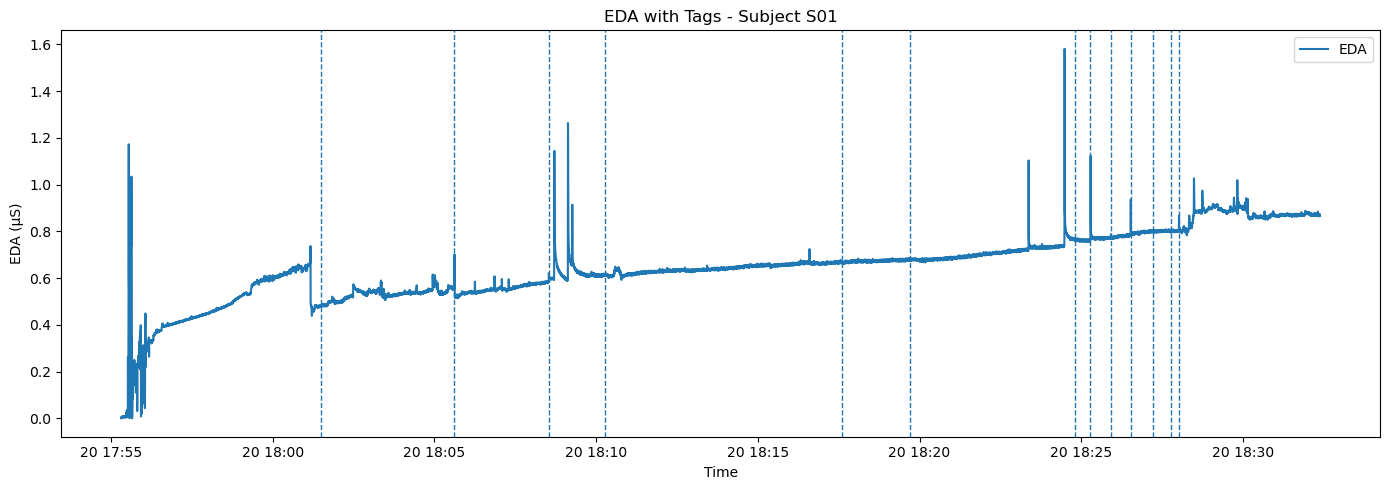

In [6]:
# Plot EDA with tag lines

plt.figure(figsize=(14, 5))

# plot EDA signal
plt.plot(eda_df["time"], eda_df["eda"], label="EDA")

# draw vertical lines for tags
for t in tag_times:
    plt.axvline(t, linestyle="--", linewidth=1)

plt.title(f"EDA with Tags - Subject {subject}")
plt.xlabel("Time")
plt.ylabel("EDA (µS)")
plt.legend()
plt.tight_layout()
plt.show()
